# One Acre Fund: Loan Performance Analysis

Analysis of loan performance data focusing on repayment rates, portfolio composition, and key performance indicators.

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import os

# Add parent directory to Python path for imports
current_dir = Path(os.getcwd())
if current_dir.name == 'src':
    project_dir = current_dir.parent
else:
    project_dir = current_dir
sys.path.append(str(project_dir))

from src import analysis
from src.viz import analysis as viz

# Load and preprocess data
raw_data = analysis.load_data("../data/raw/training_loan_processed.csv")
df = analysis.preprocess_data(raw_data)


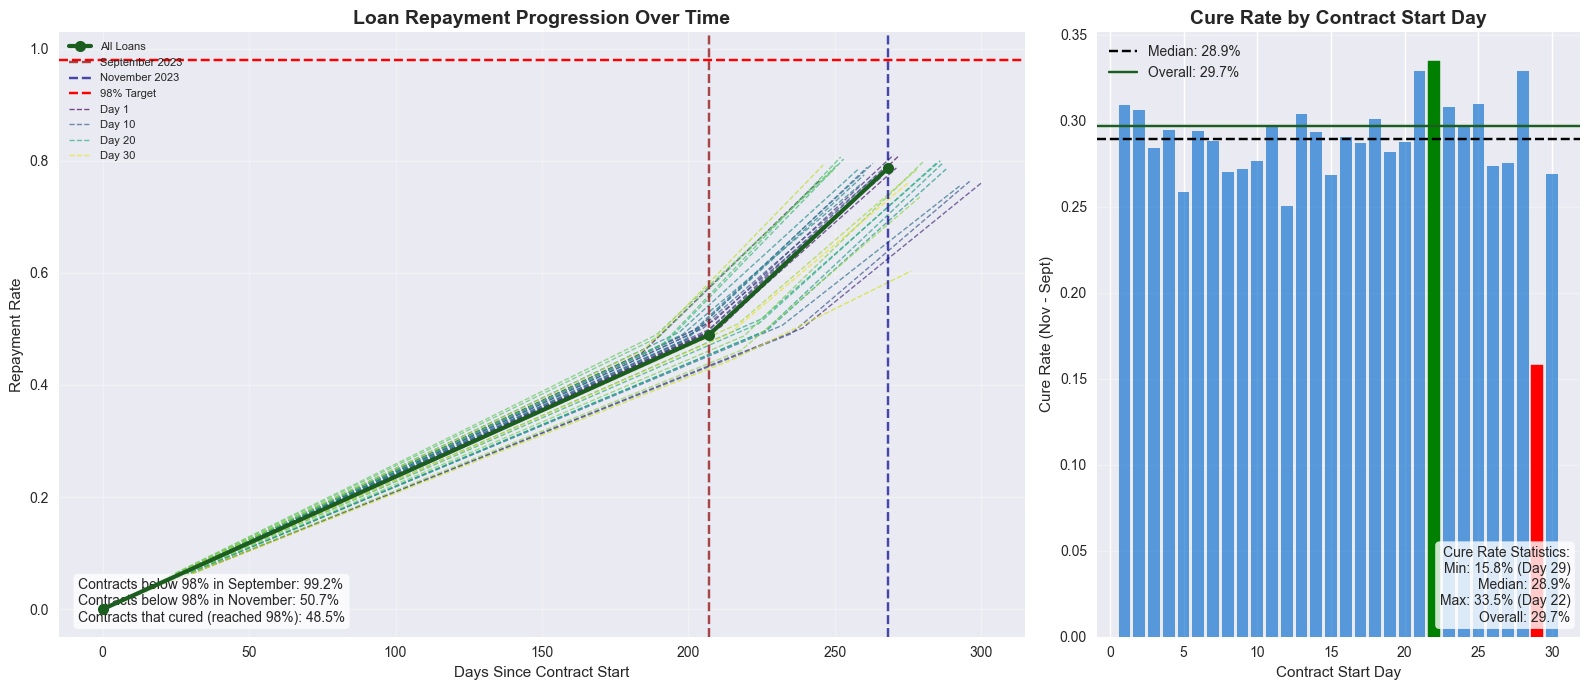

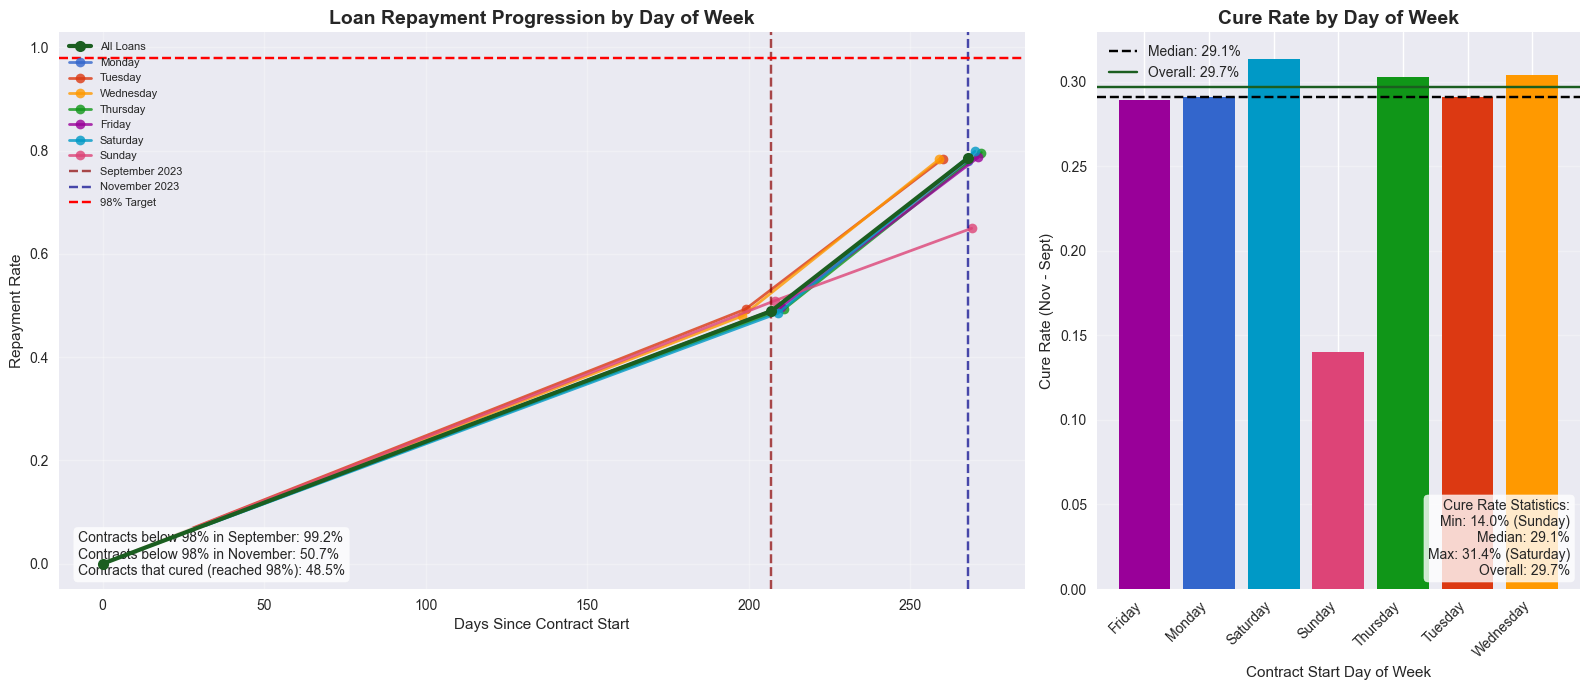

In [ ]:

# # Analyze and plot repayment curves by day
# overall_progress, day_cure_rates, stats = analysis.analyze_repayment_curves(df)
# fig = viz.plot_repayment_curve_with_cure_rates(df, overall_progress, day_cure_rates, stats)
# plt.show()

# # Analyze and plot repayment curves by weekday
# overall_progress, weekday_cure_rates, weekday_colors, stats = analysis.analyze_repayment_by_weekday(df)
# fig = viz.plot_repayment_curve_by_weekday(df, overall_progress, weekday_cure_rates, weekday_colors, stats)
# plt.show()

In [10]:
%reload_ext autoreload
stats = analysis.get_summary_statistics(df)

print("\nPortfolio Overview:")
print(f"Total Portfolio Value: KES {stats['total_portfolio_kes']:,.0f} (USD {stats['total_portfolio_usd']:,.0f})")
print(f"Total Loans: {stats['loan_count']:,}")

print("\nLoan Values:")
print(f"Average Loan: KES {stats['avg_loan_value']:,.0f} (USD {stats['avg_loan_value_usd']:,.0f})")
print(f"Median Loan: KES {stats['median_loan_value']:,.0f} (USD {stats['median_loan_value_usd']:,.0f})")

print("\nRepayment Performance:")
print(f"Average Rate: {stats['avg_repayment_rate']:.1%}")
print(f"Target Achievement: {stats['target_achievement_rate']:.1%}")
print(f"Median Deposit Ratio: {stats['median_deposit_ratio']:.1%}")

print("\nPortfolio Composition:")
for loan_type, count in stats['loan_type_counts'].items():
    print(f"- {loan_type}: {count:,} loans")


Portfolio Overview:
Total Portfolio Value: KES 145,898,665 (USD 1,122,297)
Total Loans: 36,215

Loan Values:
Average Loan: KES 4,029 (USD 31)
Median Loan: KES 3,094 (USD 24)

Repayment Performance:
Average Rate: 78.6%
Target Achievement: 49.3%
Median Deposit Ratio: 20.9%

Portfolio Composition:
- Group Loan: 34,056 loans
- Individual Loan: 2,158 loans
- Paygo Loan: 1 loans


In [11]:
# Visualize loan portfolio composition
fig = analysis.plot_loan_portfolio_composition(df)
plt.tight_layout()
plt.show()

AttributeError: module 'src.analysis' has no attribute 'plot_loan_portfolio_composition'

In [12]:
# Analyze repayment rate distribution
fig = analysis.plot_repayment_distribution_comparison(df)
plt.tight_layout()
plt.show()

AttributeError: module 'src.analysis' has no attribute 'plot_repayment_distribution_comparison'

In [13]:
from src import analysis
from src.viz import analysis as viz

# Set style for plots
plt.style.use('seaborn-v0_8')

In [14]:
#Calculate repayment statistics for September
sept_stats = {
    'mean': df['sept_23_repayment_rate'].mean(),
    'median': df['sept_23_repayment_rate'].median(),
    'target_achieved': (df['sept_23_repayment_rate'] >= 0.98).mean(),
    'count': len(df)
}

# Calculate repayment statistics for November
nov_stats = {
    'mean': df['nov_23_repayment_rate'].mean(),
    'median': df['nov_23_repayment_rate'].median(),
    'target_achieved': (df['nov_23_repayment_rate'] >= 0.98).mean(),
    'count': len(df)
}

# Plot repayment distributions
dist_fig = viz.plot_repayment_distribution_comparison(df, sept_stats, nov_stats)

AttributeError: module 'src.viz.analysis' has no attribute 'plot_repayment_distribution_comparison'

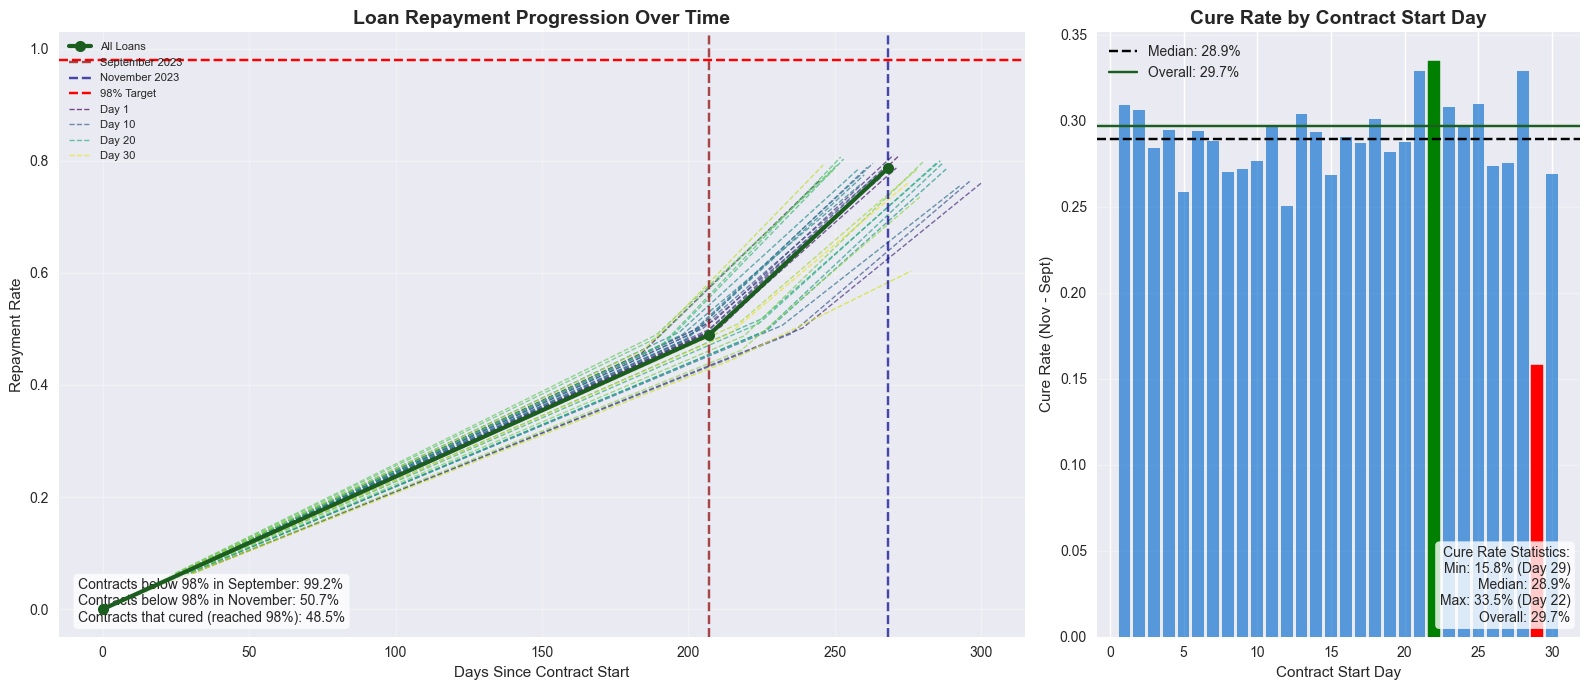

In [15]:
# Analyze repayment curves by day
overall_progress, day_cure_rates, stats = analysis.analyze_repayment_curves(df)
fig = viz.plot_repayment_curve_with_cure_rates(df, overall_progress, day_cure_rates, stats)
plt.show()


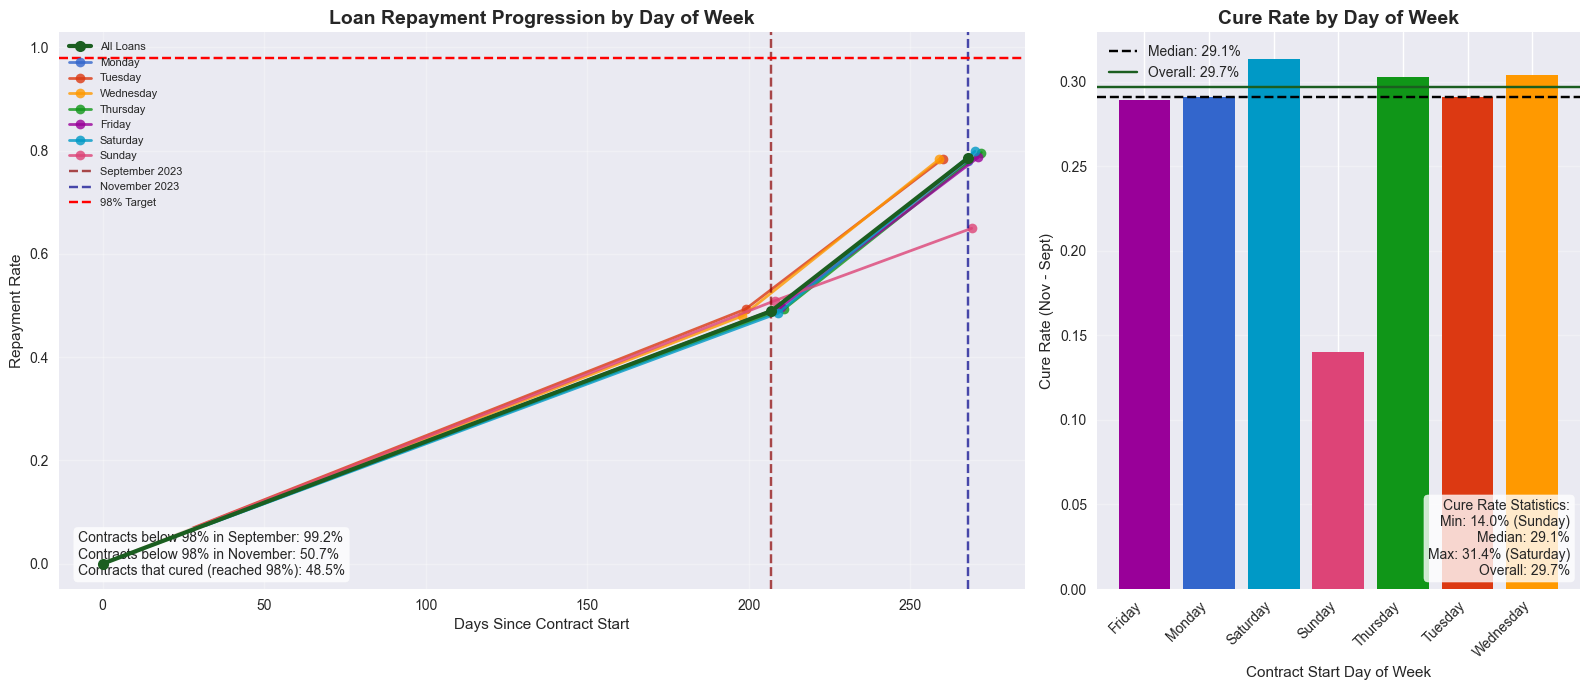

In [16]:

# Analyze repayment curves by weekday
overall_progress, weekday_cure_rates, weekday_colors, stats = analysis.analyze_repayment_by_weekday(df)
fig = viz.plot_repayment_curve_by_weekday(df, overall_progress, weekday_cure_rates, weekday_colors, stats)
plt.show()

In [17]:
# Analyze regional performance with confidence intervals
fig = analysis.plot_regional_performance(df)
plt.tight_layout()
plt.show()

AttributeError: module 'src.analysis' has no attribute 'plot_regional_performance'

In [18]:
# Analyze relationship between loan value and repayment rate
fig = analysis.plot_loan_value_repayment(df)
plt.tight_layout()
plt.show()

AttributeError: module 'src.analysis' has no attribute 'plot_loan_value_repayment'

In [19]:
# Analyze impact of deposit ratio on repayment performance
fig, stats = analysis.analyze_deposit_ratio(df)
plt.tight_layout()
plt.show()

print("\nDeposit Ratio Statistics:")
print(stats.round(4))

AttributeError: module 'src.analysis' has no attribute 'analyze_deposit_ratio'

In [20]:
# Analyze temporal trends in repayment rates
fig, stats = analysis.analyze_temporal_trends(df, n_bins=6)
plt.tight_layout()
plt.show()

print("\nMonthly Performance Statistics:")
print(stats.round(4))

AttributeError: module 'src.analysis' has no attribute 'analyze_temporal_trends'

In [21]:
# Segment clients based on repayment performance
fig, stats = analysis.segment_clients(df)
plt.tight_layout()
plt.show()

print("\nSegment Statistics:")
print(stats.round(4))

AttributeError: module 'src.analysis' has no attribute 'segment_clients'

In [22]:
# Analyze geographic patterns in repayment performance
fig, stats = analysis.analyze_geographic_patterns(df)
plt.tight_layout()
plt.show()

print("\nGeographic Performance Statistics:")
print(stats.round(4))

AttributeError: module 'src.analysis' has no attribute 'analyze_geographic_patterns'

## Feature Engineering

In [28]:
from src import analysis
from src import model_development as md
from src import geo_features
import pandas as pd

# Load and preprocess data
raw_data = analysis.load_data("../data/raw/training_loan_processed.csv")
df = analysis.preprocess_data(raw_data)

# Add engineered features
df_with_features = md.engineer_features(df)

# Load cached duka locations (faster, no API calls)
cached_locations = pd.read_csv('../data/processed/duka_locations.csv')

# Add geographic features using cached data
df_with_geo = df_with_features.merge(
    cached_locations[[
        'duka_name',
        'latitude',
        'longitude',
        'region'
    ]],
    on=['duka_name', 'region'],
    how='left'
)

# Calculate distances using cached coordinates
region_centroids = geo_features.calculate_region_centroids(cached_locations)
df_with_distances = geo_features.calculate_distances(df_with_geo, region_centroids)

# For any new locations not in cache, use imputation
df_with_distances = geo_features.impute_missing_coordinates(df_with_distances)

# The geocoding function (geocode_dukas) should only be used when:
# 1. Initially creating the cache file
# 2. Adding new duka locations not in the cache
# 3. Updating coordinates periodically (e.g., monthly/quarterly)

print("\nFeatures ready for modeling:")
print("1. Historical metrics:", [col for col in df_with_distances.columns if 'historical' in col])
print("2. Distance features:", [col for col in df_with_distances.columns if 'distance_to' in col])
print("3. Relative metrics:", [col for col in df_with_distances.columns if 'rank' in col])

KeyError: 'Column not found: None'